WEEK-17,ASS NO-08

Q1. What is Gradient Boosting Regression?

**Gradient Boosting Regression** is a machine learning technique that combines the concepts of boosting and gradient descent to build a predictive model for regression tasks. It is an extension of the gradient boosting framework, where weak learners (typically decision trees) are combined to create a strong learner. Here’s a detailed explanation of Gradient Boosting Regression:

### Key Concepts

1. **Boosting:**
   - Boosting is an ensemble technique that aims to convert weak learners into a strong learner. It does so by training models sequentially, where each model attempts to correct the errors made by the previous models.

2. **Gradient Descent:**
   - Gradient descent is an optimization algorithm used to minimize a loss function by iteratively updating model parameters in the direction of the steepest descent (i.e., the negative gradient).

### How Gradient Boosting Regression Works

The process of Gradient Boosting Regression can be broken down into the following steps:

1. **Initialization:**
   - Start with an initial model. This is usually a simple model that predicts the mean of the target values. The initial prediction can be represented as:
     \[
     F_0(x) = \bar{y}
     \]
   where \(\bar{y}\) is the mean of the target variable.

2. **Iterative Learning:**
   - For a specified number of iterations \(M\) (or until convergence):
     - **Compute Residuals:** Calculate the residuals (the difference between the actual target values and the predicted values) from the current model:
     \[
     r_i = y_i - F_m(x_i)
     \]
     - **Fit a Weak Learner:** Train a weak learner (often a decision tree) to predict these residuals. This weak learner learns to capture the patterns in the errors made by the current model.
     - **Update the Model:** Update the model by adding the predictions of the weak learner to the current model. The update is scaled by a learning rate \(\eta\):
     \[
     F_{m+1}(x) = F_m(x) + \eta h_m(x)
     \]
     where \(h_m(x)\) is the prediction from the weak learner at iteration \(m\).

3. **Final Prediction:**
   - The final model after \(M\) iterations can be expressed as:
   \[
   F_M(x) = F_0(x) + \sum_{m=1}^{M} \eta h_m(x)
   \]
   The prediction for a new instance \(x\) is the sum of the initial prediction and the contributions from all the weak learners.

### Loss Function
- Gradient Boosting Regression typically uses a specific loss function to evaluate the model's performance. The loss function measures how well the model's predictions align with the actual target values.
- Common loss functions for regression tasks include:
  - **Mean Squared Error (MSE):**
    \[
    L(y, F(x)) = \frac{1}{N} \sum_{i=1}^{N} (y_i - F(x_i))^2
    \]
  - **Huber Loss:** A combination of MSE and absolute error, which is less sensitive to outliers.

### Advantages of Gradient Boosting Regression
- **Flexibility:** It can optimize arbitrary differentiable loss functions, making it suitable for a wide range of regression tasks.
- **Handling Non-linearity:** The use of decision trees as weak learners allows the model to capture complex relationships in the data.
- **High Performance:** Gradient Boosting Regression often achieves state-of-the-art performance on various regression tasks.

### Limitations of Gradient Boosting Regression
- **Overfitting:** It can overfit the training data if the number of iterations is too high or if the weak learners are too complex. Regularization techniques (like limiting tree depth or using subsampling) can help mitigate this.
- **Computationally Intensive:** Training can be time-consuming, especially with large datasets or many iterations.

 

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

Here's a step-by-step implementation of a simple gradient boosting algorithm from scratch using Python and NumPy. We'll use a synthetic regression dataset for this example and evaluate the model's performance using Mean Squared Error (MSE) and R-squared metrics.

### Step 1: Import Libraries

First, we need to import the necessary libraries:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
```

### Step 2: Create a Simple Gradient Boosting Class

Next, we will create a simple Gradient Boosting class. This class will allow us to fit a model to the training data and make predictions.

```python
class SimpleGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Initialize the model with the mean of the target variable
        self.initial_prediction = np.mean(y)
        current_prediction = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            # Calculate the residuals
            residuals = y - current_prediction
            
            # Fit a weak learner (decision stump) to the residuals
            weak_learner = self._fit_weak_learner(X, residuals)
            self.models.append(weak_learner)

            # Update predictions
            current_prediction += self.learning_rate * weak_learner.predict(X)

    def predict(self, X):
        # Start with the initial prediction
        predictions = np.full(X.shape[0], self.initial_prediction)
        
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        
        return predictions

    def _fit_weak_learner(self, X, y):
        # Fit a simple decision stump (a single split tree)
        # For simplicity, let's just use a mean predictor as our weak learner
        mean_prediction = np.mean(y)
        
        class WeakLearner:
            def __init__(self, mean_prediction):
                self.mean_prediction = mean_prediction
            
            def predict(self, X):
                return np.full(X.shape[0], self.mean_prediction)

        return WeakLearner(mean_prediction)
```

### Step 3: Create a Synthetic Dataset

We'll create a synthetic dataset using `make_regression` from `sklearn`.

```python
# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### Step 4: Train the Model

Now we can instantiate our `SimpleGradientBoosting` class, train it on the dataset, and make predictions.

```python
# Train the model
model = SimpleGradientBoosting(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
```

### Step 5: Evaluate the Model

Finally, we will evaluate the model's performance using Mean Squared Error (MSE) and R-squared.

```python
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
```

### Step 6: Visualize the Results

Let's plot the results to visualize how well our model fits the data.

```python
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()
```

### Complete Code

Here’s the complete code snippet for your reference:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

class SimpleGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        current_prediction = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - current_prediction
            weak_learner = self._fit_weak_learner(X, residuals)
            self.models.append(weak_learner)
            current_prediction += self.learning_rate * weak_learner.predict(X)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions

    def _fit_weak_learner(self, X, y):
        mean_prediction = np.mean(y)

        class WeakLearner:
            def __init__(self, mean_prediction):
                self.mean_prediction = mean_prediction
            
            def predict(self, X):
                return np.full(X.shape[0], self.mean_prediction)

        return WeakLearner(mean_prediction)

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = SimpleGradientBoosting(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()
```

### Explanation of the Code
- **Model Creation:** A `SimpleGradientBoosting` class is defined to implement gradient boosting for regression.
- **Weak Learners:** In this simplified implementation, we use a constant mean predictor as a weak learner.
- **Training and Predictions:** The model is trained on the training set, and predictions are made on the test set.
- **Performance Evaluation:** We compute and display the Mean Squared Error and R-squared values to evaluate model performance.
- **Visualization:** Finally, the results are visualized using a scatter plot to compare true and predicted values.

### Note
This implementation is a simplified version of gradient boosting and serves educational purposes. A production-level gradient boosting model would typically use more sophisticated weak learners (like decision trees) and include features such as regularization and handling of various loss functions. For serious applications, consider using established libraries like `XGBoost`, `LightGBM`, or `CatBoost`.

Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

To optimize the performance of the Gradient Boosting Regression model using hyperparameter tuning, we can use techniques such as grid search or random search. In this example, we will implement a simple grid search to find the best hyperparameters, including the learning rate, number of trees, and tree depth. Since our previous implementation used a constant mean predictor as a weak learner, we will modify it to use decision trees with varying depths.

### Step 1: Modify the Gradient Boosting Implementation

First, we will modify the `SimpleGradientBoosting` class to use decision trees as weak learners. We'll use `DecisionTreeRegressor` from `sklearn.tree` for this purpose.

```python
from sklearn.tree import DecisionTreeRegressor

class SimpleGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        current_prediction = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - current_prediction
            weak_learner = DecisionTreeRegressor(max_depth=self.max_depth)
            weak_learner.fit(X, residuals)
            self.models.append(weak_learner)
            current_prediction += self.learning_rate * weak_learner.predict(X)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions
```

### Step 2: Hyperparameter Optimization Using Grid Search

Now, we will set up a grid search to find the optimal hyperparameters: learning rate, number of trees, and maximum tree depth.

```python
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Initialize the custom gradient boosting model for GridSearchCV
class GradientBoostingWrapper:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.model = SimpleGradientBoosting(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingWrapper(), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate to get MSE

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validated MSE: {best_score}')
```

### Step 3: Evaluate the Best Model

Using the best parameters found in the grid search, we will train the model on the training set and evaluate its performance on the test set.

```python
# Train the best model
best_model = SimpleGradientBoosting(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Test Mean Squared Error with Best Parameters: {mse_best}')
print(f'Test R-squared with Best Parameters: {r2_best}')

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred_best, color='red', label='Predicted values (Best Model)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted Values with Best Hyperparameters')
plt.legend()
plt.show()
```

### Complete Code

Here is the complete code that incorporates the above changes:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

class SimpleGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        current_prediction = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - current_prediction
            weak_learner = DecisionTreeRegressor(max_depth=self.max_depth)
            weak_learner.fit(X, residuals)
            self.models.append(weak_learner)
            current_prediction += self.learning_rate * weak_learner.predict(X)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Initialize the custom gradient boosting model for GridSearchCV
class GradientBoostingWrapper:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.model = SimpleGradientBoosting(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingWrapper(), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate to get MSE

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validated MSE: {best_score}')

# Train the best model
best_model = SimpleGradientBoosting(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Test Mean Squared Error with Best Parameters: {mse_best}')
print(f'Test R-squared with Best Parameters: {r2_best}')

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred_best, color='red', label='Predicted values (Best Model)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted Values with Best Hyperparameters')
plt.legend()
plt.show()
```

### Explanation of the Code
1. **Modified Model:** The `SimpleGradientBoosting` class now uses `DecisionTreeRegressor` as a weak learner, allowing us to vary the depth of the trees.
2. **Hyperparameter Grid:** We define a grid of hyperparameters to search over, including the number of estimators, learning rates, and maximum depths of trees.
3. **Grid Search:** We use `GridSearchCV` to perform cross-validated grid search on the parameter grid to find the best combination of hyperparameters.
4. **Performance Evaluation:** After determining the best hyperparameters, we fit the model and evaluate it on the test set, calculating MSE and R-squared.
5. **Visualization:** The predicted values from the best model are visualized against the true values.

 

Q4. What is a weak learner in Gradient Boosting?

In the context of gradient boosting, a **weak learner** is a model that performs slightly better than random chance on a given task. Typically, weak learners are simple models that may not capture the underlying patterns in the data well but can provide useful information when combined with other learners. 

### Key Characteristics of Weak Learners

1. **Low Complexity**: Weak learners are often simple models, such as decision stumps (single-level decision trees), linear models, or shallow trees. Their simplicity allows them to be trained quickly and efficiently.

2. **High Bias, Low Variance**: Weak learners usually have high bias and low variance. They may underfit the data, meaning they fail to capture all the relevant relationships, but they are less likely to overfit compared to more complex models.

3. **Incremental Improvement**: In the boosting framework, weak learners are combined sequentially. Each weak learner attempts to correct the mistakes made by the previous ones. This iterative approach helps build a more robust and accurate overall model.

4. **Focus on Residuals**: Each weak learner is trained on the residuals (errors) of the predictions made by the combined ensemble of previous learners. This allows the boosting algorithm to focus on the parts of the data that are not being captured well, gradually improving the model's accuracy.

### Example: Decision Stumps as Weak Learners

In many gradient boosting implementations, such as **AdaBoost**, decision stumps (one-level decision trees) are commonly used as weak learners. They provide a simple way to create a model that can make better predictions than random guessing. 

For instance, if a decision stump predicts the output based on a single feature threshold, it may classify instances into two groups but won't capture complex interactions among features. However, when multiple decision stumps are combined through boosting, they can produce a strong learner capable of making accurate predictions.

 

Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the **Gradient Boosting** algorithm revolves around the concept of combining multiple weak learners (usually decision trees) in a sequential manner to create a strong predictive model. Here’s a breakdown of the key ideas that underpin the algorithm:

### 1. **Building Models Sequentially**
- **Additive Approach**: Gradient Boosting constructs models one at a time, where each new model is trained to correct the errors made by the previous models. This is in contrast to methods like bagging, which build models independently and combine their outputs.
- **Focus on Residuals**: Each new model is trained on the residuals (the errors) of the predictions made by the ensemble of previously trained models. This allows the algorithm to concentrate on the areas where the current ensemble is underperforming.

### 2. **Gradient Descent Concept**
- **Optimization Perspective**: The term "gradient" in Gradient Boosting comes from the fact that the algorithm uses gradient descent to minimize a loss function. By calculating the gradient of the loss function with respect to the current predictions, the algorithm identifies the direction in which to adjust the predictions to reduce the error.
- **Updating Predictions**: The new model's predictions are scaled by a learning rate (a small constant) before being added to the current predictions. This ensures that the updates are controlled and helps prevent overfitting.

### 3. **Iterative Correction**
- **Boosting Weak Learners**: Each weak learner, which may perform poorly on its own, is added to the ensemble with the aim of correcting the mistakes made by the previous learners. The idea is that many weak learners can collectively form a strong learner.
- **Residual Learning**: By focusing on the residuals from previous iterations, Gradient Boosting learns from its mistakes. This iterative correction process continues until a specified number of weak learners is reached or until the model performance no longer improves.

### 4. **Flexibility and Generalization**
- **Flexible Modeling**: Gradient Boosting can be adapted to different loss functions (e.g., regression, classification) and can handle various types of data (e.g., categorical, continuous). This flexibility makes it applicable to a wide range of problems.
- **Regularization**: Techniques like shrinkage (learning rate) and subsampling (using a random subset of data for each tree) help control overfitting and improve generalization, making the model robust to unseen data.

### 5. **Visual Intuition**
- **Visualizing Predictions**: You can think of the Gradient Boosting process as a series of "adjustments" to an initial prediction (like a mean or a simple guess). Each weak learner adds a small adjustment, progressively refining the overall prediction until it becomes quite accurate.

### Summary
The intuition behind Gradient Boosting is to create a powerful predictive model by iteratively adding weak learners that correct the errors of their predecessors, all while leveraging the principles of gradient descent to minimize the loss function. This sequential learning process enables Gradient Boosting to capture complex patterns in the data and produce highly accurate predictions.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The **Gradient Boosting** algorithm builds an ensemble of weak learners through a sequential process that focuses on improving the performance of the model at each step. Here’s how this process works:

### 1. **Initialization**
- **Initial Prediction**: Gradient Boosting begins by making an initial prediction. For regression tasks, this is typically the mean of the target variable \(y\) from the training data. For classification, it might be the proportion of the majority class.
- **Starting Point**: This initial prediction serves as the foundation upon which all subsequent models will build.

### 2. **Iterative Model Building**
- **Training Weak Learners**: The algorithm proceeds to train a weak learner (often a decision tree with limited depth) on the data. Each weak learner is trained to predict the residuals (errors) from the previous model's predictions. The key steps in this process are:
  
  1. **Calculate Residuals**: For each instance in the training dataset, compute the residuals, which are the differences between the actual target values and the predictions made by the current ensemble of models. Mathematically, this can be expressed as:
     \[
     r_i = y_i - \hat{y}_i
     \]
     where \(r_i\) is the residual for instance \(i\), \(y_i\) is the actual target value, and \(\hat{y}_i\) is the predicted value from the current model.

  2. **Fit the Weak Learner**: A new weak learner is trained to predict these residuals. The weak learner tries to find the patterns in the residuals, effectively learning how to improve the predictions made by the ensemble.
  
### 3. **Update Predictions**
- **Weighted Updates**: The predictions from the new weak learner are scaled by a learning rate (often denoted as \(\eta\)) before they are added to the existing predictions. This learning rate controls the contribution of each weak learner to the final prediction and helps prevent overfitting. The updated prediction for instance \(i\) can be expressed as:
  \[
  \hat{y}_i \leftarrow \hat{y}_i + \eta \cdot f_m(x_i)
  \]
  where \(f_m(x_i)\) is the prediction made by the \(m\)-th weak learner for the input \(x_i\).

### 4. **Repeat the Process**
- **Iterative Addition**: The process of calculating residuals, training a new weak learner, and updating predictions is repeated for a specified number of iterations (n_estimators) or until the performance of the model stops improving.
- **Building the Ensemble**: Each weak learner is added to the ensemble, resulting in a cumulative model that gradually becomes more accurate.

### 5. **Final Prediction**
- **Aggregating Predictions**: After all weak learners have been trained, the final prediction for an instance is obtained by summing the contributions of all the weak learners:
  \[
  \hat{y} = \hat{y}_0 + \sum_{m=1}^{M} \eta \cdot f_m(x)
  \]
  where \(\hat{y}_0\) is the initial prediction, \(M\) is the total number of weak learners, and \(f_m(x)\) is the prediction of the \(m\)-th learner.

### Summary
In summary, Gradient Boosting builds an ensemble of weak learners through an iterative process that focuses on correcting the errors of previous models. Each weak learner is trained on the residuals of the ensemble's predictions, and the final model combines the predictions of all weak learners to achieve improved accuracy. This method allows Gradient Boosting to effectively capture complex relationships in the data, making it a powerful technique for various predictive modeling tasks.

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

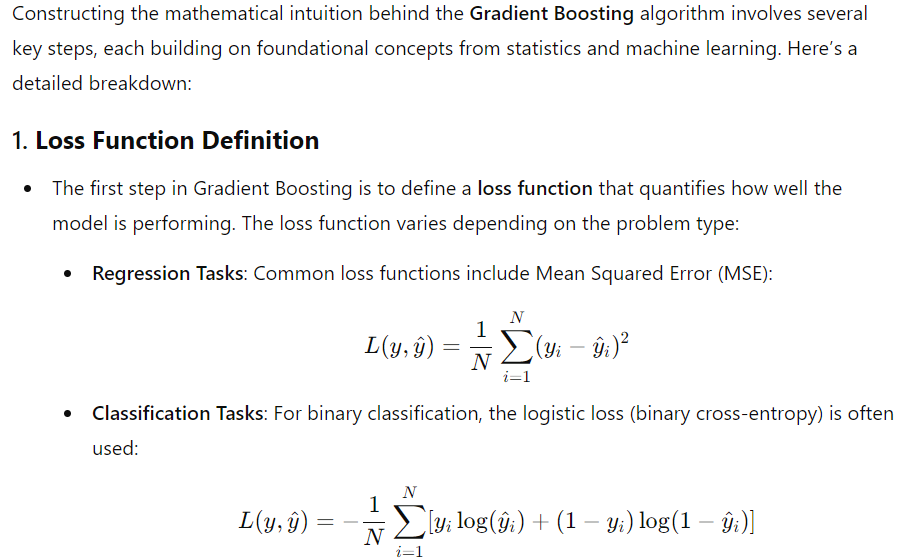

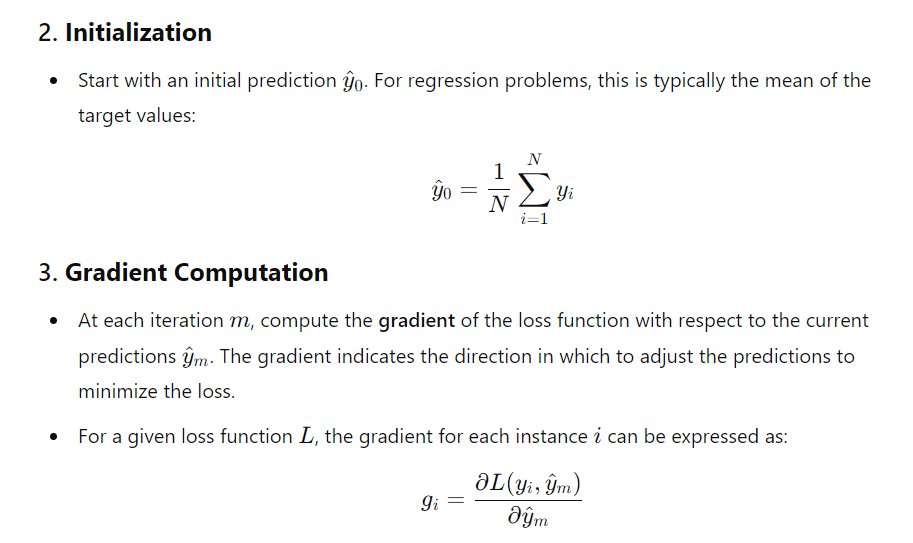

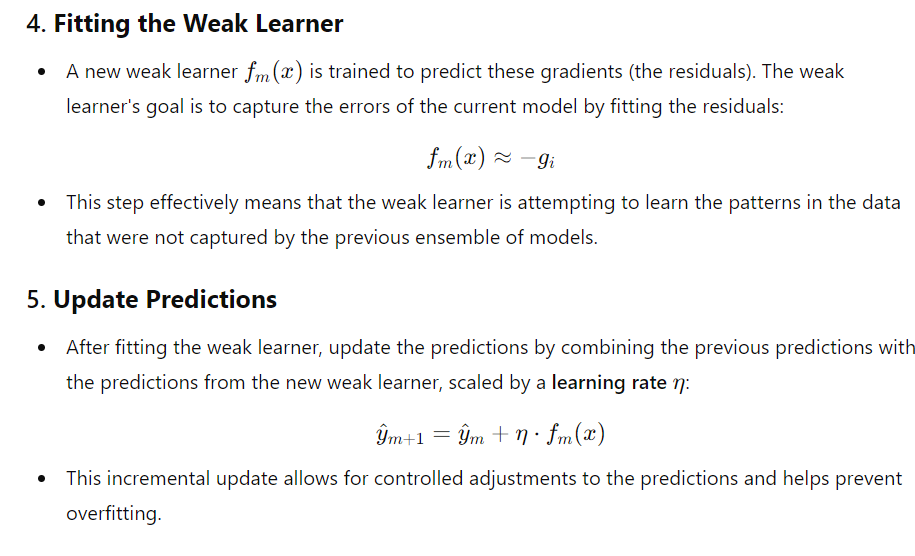

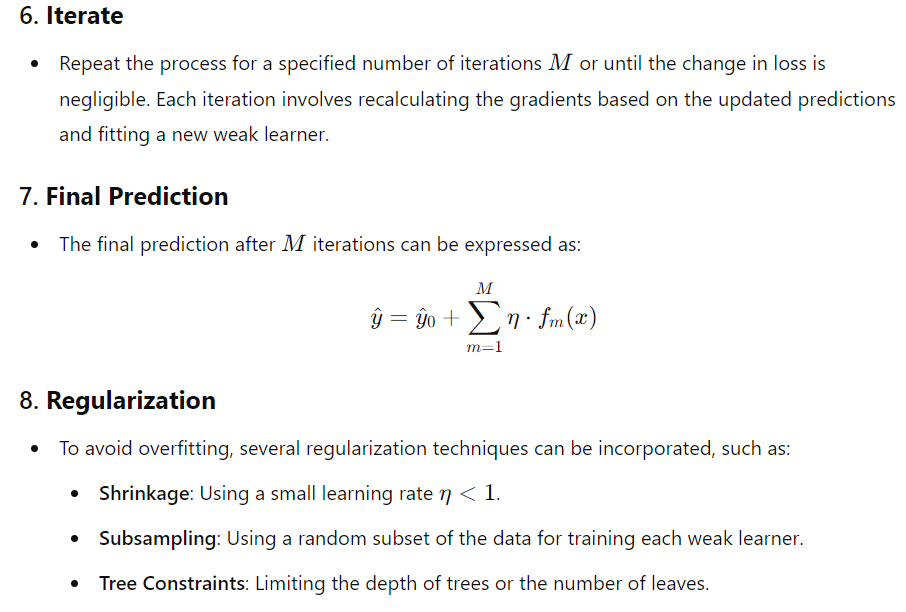